In [2]:
from fit_model_ import *

### Model 2.1

In [28]:
def define_embed_model(src_vocab,tar_vocab,src_timesteps,tar_timesteps, n_units, g_units,function="softmax"):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # Implement
    learning_rate = 0.001

    e = Embedding(src_vocab, n_units, input_length = src_timesteps,mask_zero=True)
    g = GRU(g_units)
    t = TimeDistributed(Dense(tar_vocab, activation=function))
  
    model = Sequential()
    model.add(e)
    model.add(g)
    model.add(RepeatVector(tar_timesteps))
   
    model.add(GRU(g_units, return_sequences=True))
    model.add(t) 
    
    return model

### Variante 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 5, 256)            581632    
                                                                 
 gru_11 (GRU)                (None, 128)               148224    
                                                                 
 repeat_vector_3 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_12 (GRU)                (None, 8, 128)            99072     
                                                                 
 time_distributed_7 (TimeDis  (None, 8, 4510)          581790    
 tributed)                                                       
                                                                 


Epoch 34/64

Epoch 34: val_loss improved from 1.96765 to 1.96263, saving model to Models\cp_model_2_1.h5
125/125 - 13s - loss: 0.7866 - acc: 0.8185 - val_loss: 1.9626 - val_acc: 0.7283 - 13s/epoch - 101ms/step
Epoch 35/64

Epoch 35: val_loss improved from 1.96263 to 1.96030, saving model to Models\cp_model_2_1.h5
125/125 - 13s - loss: 0.7529 - acc: 0.8241 - val_loss: 1.9603 - val_acc: 0.7285 - 13s/epoch - 101ms/step
Epoch 36/64

Epoch 36: val_loss improved from 1.96030 to 1.95195, saving model to Models\cp_model_2_1.h5
125/125 - 13s - loss: 0.7190 - acc: 0.8300 - val_loss: 1.9519 - val_acc: 0.7288 - 13s/epoch - 106ms/step
Epoch 37/64

Epoch 37: val_loss did not improve from 1.95195
125/125 - 12s - loss: 0.6892 - acc: 0.8357 - val_loss: 1.9652 - val_acc: 0.7297 - 12s/epoch - 98ms/step
Epoch 38/64

Epoch 38: val_loss did not improve from 1.95195
125/125 - 12s - loss: 0.6632 - acc: 0.8411 - val_loss: 1.9618 - val_acc: 0.7310 - 12s/epoch - 94ms/step
Epoch 39/64

Epoch 39: val_loss did not 

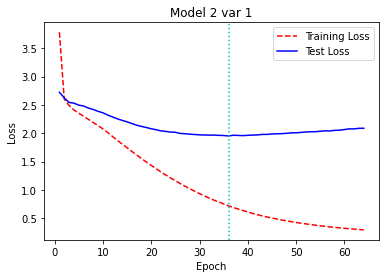

In [29]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=64
batch_size=64
model_save_file_name='Models/cp_model_2_1.h5'
history_save_file_name="cp_history_2_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
create_model(model,loss_func,learning_rate)
plot_model(model, to_file='model_images/cp_model_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/cp_model_2_1_m.png', 'Model 2 var 1')

### Variante 2

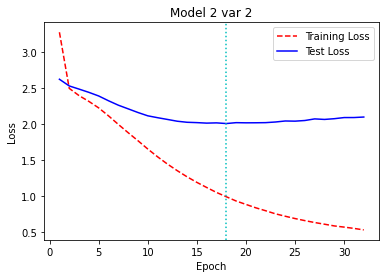

In [32]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
g_units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=32
batch_size=64
model_save_file_name='Models/cp_model_2_2.h5'
history_save_file_name="cp_history_2_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_2 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"softmax")
create_model(model2_2,loss_func,learning_rate)
plot_model(model2_2, to_file='model_images/cp_model_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_2.history, 'loss_vs_epochs_images/cp_model_2_2_le.png', 'Model 2 var 2')

### Variante 3

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 5, 64)             145408    
                                                                 
 gru_15 (GRU)                (None, 32)                9408      
                                                                 
 repeat_vector_5 (RepeatVect  (None, 8, 32)            0         
 or)                                                             
                                                                 
 gru_16 (GRU)                (None, 8, 32)             6336      
                                                                 
 time_distributed_9 (TimeDis  (None, 8, 4510)          148830    
 tributed)                                                       
                                                                 


63/63 - 8s - loss: 1.6212 - acc: 0.7018 - val_loss: 2.2380 - val_acc: 0.6794 - 8s/epoch - 126ms/step
Epoch 35/64

Epoch 35: val_loss improved from 2.23803 to 2.23547, saving model to Models\cp_model_2_3.h5
63/63 - 8s - loss: 1.5904 - acc: 0.7053 - val_loss: 2.2355 - val_acc: 0.6792 - 8s/epoch - 131ms/step
Epoch 36/64

Epoch 36: val_loss improved from 2.23547 to 2.22610, saving model to Models\cp_model_2_3.h5
63/63 - 8s - loss: 1.5627 - acc: 0.7073 - val_loss: 2.2261 - val_acc: 0.6826 - 8s/epoch - 129ms/step
Epoch 37/64

Epoch 37: val_loss improved from 2.22610 to 2.21766, saving model to Models\cp_model_2_3.h5
63/63 - 8s - loss: 1.5359 - acc: 0.7103 - val_loss: 2.2177 - val_acc: 0.6825 - 8s/epoch - 128ms/step
Epoch 38/64

Epoch 38: val_loss did not improve from 2.21766
63/63 - 8s - loss: 1.5112 - acc: 0.7134 - val_loss: 2.2185 - val_acc: 0.6827 - 8s/epoch - 126ms/step
Epoch 39/64

Epoch 39: val_loss did not improve from 2.21766
63/63 - 8s - loss: 1.4840 - acc: 0.7162 - val_loss: 2.2195

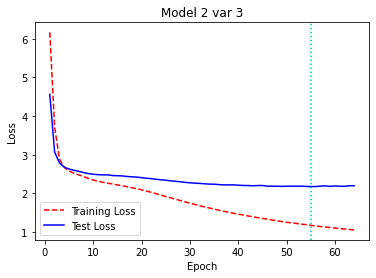

In [34]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
g_units=32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=64
batch_size=128
model_save_file_name='Models/cp_model_2_3.h5'
history_save_file_name="cp_history_2_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_3 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"sigmoid")
create_model(model2_3,loss_func,learning_rate)
plot_model(model2_3, to_file='model_images/cp_model_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_3.history, 'loss_vs_epochs_images/cp_model_2_3_le.png', 'Model 2 var 3')

Text(0, 0.5, 'LOSS')

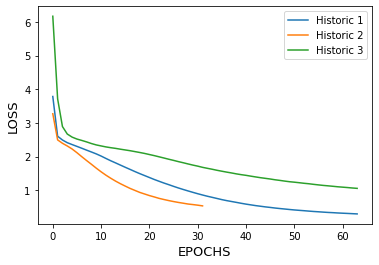

In [4]:
hist1 = load_history("cp_history_2_1.npy")
hist2 = load_history("cp_history_2_2.npy")
hist3 = load_history("cp_history_2_3.npy")
for x in ['loss']:
    plt.plot(hist1[x],label="Historic 1")
    plt.plot(hist2[x],label="Historic 2")
    plt.plot(hist3[x],label="Historic 3")
plt.legend()
plt.xlabel("EPOCHS",fontsize=13)
plt.ylabel("LOSS",fontsize=13)